### Package Python

In [61]:
import pandas as pd
import numpy as np
import xarray as xr
import os as os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot
from sklearn import linear_model

### Reading of bases

In [2]:
_path = os.getcwd()
_path

'c:\\git\\Gol_Cases'

In [3]:
_path = os.path.join(_path, 'data', 'Case Analytics-DS.xlsx')
_path

'c:\\git\\Gol_Cases\\data\\Case Analytics-DS.xlsx'

In [4]:
_df = pd.read_excel(io=_path, sheet_name='Dados')
_df.head(2)

,Data Venda,Canal de Venda,Local de Venda,PAX,Monetário Vendido,RPK
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197


In [5]:
_df.columns = _df.columns.str.lower()
_df.columns

Index(['data venda', 'canal de venda', 'local de venda', 'pax',
       'monetário vendido', 'rpk'],
      dtype='object')

In [6]:
_df.columns = _df.columns.str.replace(' ', '_')
_df.columns

Index(['data_venda', 'canal_de_venda', 'local_de_venda', 'pax',
       'monetário_vendido', 'rpk'],
      dtype='object')

In [7]:
_df.describe()

,pax,monetário_vendido,rpk
count,2432.000000,2432.000000,2432.000000
mean,723.002878,24638.740498,66738.389391
std,735.936451,22424.842904,83479.039478
min,18.000000,1041.544400,1127.000000
25%,100.000000,6122.920492,11372.000000
50%,395.500000,17755.421730,33361.500000
75%,1160.250000,35535.323991,95116.750000
max,4705.000000,144890.731053,695824.000000


In [8]:
_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data_venda         2432 non-null   datetime64[ns]
 1   canal_de_venda     2432 non-null   object        
 2   local_de_venda     2432 non-null   object        
 3   pax                2432 non-null   int64         
 4   monetário_vendido  2432 non-null   float64       
 5   rpk                2432 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 114.1+ KB


In [9]:
_df.dtypes

data_venda           datetime64[ns]
canal_de_venda               object
local_de_venda               object
pax                           int64
monetário_vendido           float64
rpk                           int64
dtype: object

* Checking values nan or nulls

In [10]:
_df.isna().sum()

data_venda           0
canal_de_venda       0
local_de_venda       0
pax                  0
monetário_vendido    0
rpk                  0
dtype: int64

In [11]:
_df.isnull().sum()

data_venda           0
canal_de_venda       0
local_de_venda       0
pax                  0
monetário_vendido    0
rpk                  0
dtype: int64

In [12]:
_df.shape

(2432, 6)

* PAX é o total de passageiros. 
* RPK (Revenue Passenger‐Kilometers) é um indicador diretamente relacionada com o número de PAX.  $ {RPK} = {PAX } * {KM} $

In [13]:
_df = _df.dropna()
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039


In [14]:
_df['km'] = _df['rpk'] / _df['pax']
_df

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087
...,...,...,...,...,...,...,...
2427,2017-04-01,Porta a Porta,Vast,1079,28486.396741,54551,50.556997
2428,2017-04-01,Porta a Porta,Ellipsis,841,23600.998318,46988,55.871581
2429,2017-04-01,TeleVenda,Arena,175,10270.292519,26599,151.994286
2430,2017-04-01,Telégrafo,Arena,105,5470.410450,15130,144.095238


* Adding km

In [15]:
def plotar(titulo: str, labelx: str, labely: str, x: str, y: str, dataset: dict, fontt: int, fontlx: int, fontly: int) -> dict: 
    """Função para plotagem de gráfico"""
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=fontt)
    ax.set_xlabel(labelx, fontsize=fontlx)
    ax.set_ylabel(labely, fontsize=fontly)
    ax = ax
    return ax

In [16]:
def plot_comparacao(x, y1,y2,y3, y4=None, params=False, dataset=None, titulo=None):
    plt.figure(figsize=(16,12))
    if params:
        ax = plt.subplot(4,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(4,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(4,1,3)
        sns.lineplot(x = x, y = y3, data = dataset) 
        ax = plt.subplot(4,1,4)
        sns.lineplot(x = x, y = y4, data = dataset)     
    else:
        ax = plt.subplot(3,1,1)
        ax.set_title(titulo, fontsize=18, loc='left')
        sns.lineplot(x = x, y = y1, data = dataset) 
        ax = plt.subplot(3,1,2)
        sns.lineplot(x = x, y = y2, data = dataset) 
        ax = plt.subplot(3,1,3)
        sns.lineplot(x = x, y = y3, data = dataset)  
    ax = ax
    return ax

In [17]:
_df['aceleracao_pax'] = _df['pax'].diff()
_df['aumento_pax'] = _df['aceleracao_pax'].diff()
_df['aceleracao_rpk'] = _df['rpk'].diff()
_df['aumento_rpk'] = _df['aceleracao_rpk'].diff()
_df['aceleracao_km'] = _df['km'].diff()
_df['aumento_km'] = _df['aceleracao_km'].diff()
_df = _df.fillna(0)
_df

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,2017-04-01,Porta a Porta,Vast,1079,28486.396741,54551,50.556997,-707.0,-2426.0,-212781.0,-472112.0,-99.124974,-129.389034
2428,2017-04-01,Porta a Porta,Ellipsis,841,23600.998318,46988,55.871581,-238.0,469.0,-7563.0,205218.0,5.314584,104.439558
2429,2017-04-01,TeleVenda,Arena,175,10270.292519,26599,151.994286,-666.0,-428.0,-20389.0,-12826.0,96.122704,90.808120
2430,2017-04-01,Telégrafo,Arena,105,5470.410450,15130,144.095238,-70.0,596.0,-11469.0,8920.0,-7.899048,-104.021752


<AxesSubplot:xlabel='data_venda', ylabel='aceleracao_pax'>

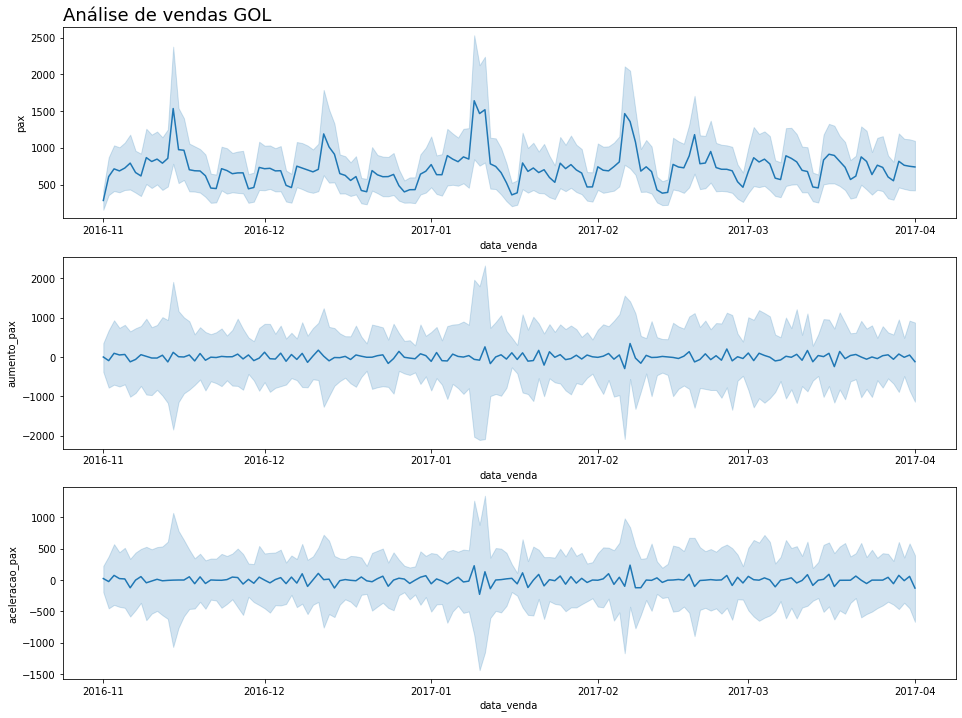

In [18]:
plot_comparacao(x='data_venda', y1='pax', y2='aumento_pax', y3='aceleracao_pax', dataset=_df, titulo='Análise de vendas GOL')

<AxesSubplot:xlabel='data_venda', ylabel='aceleracao_rpk'>

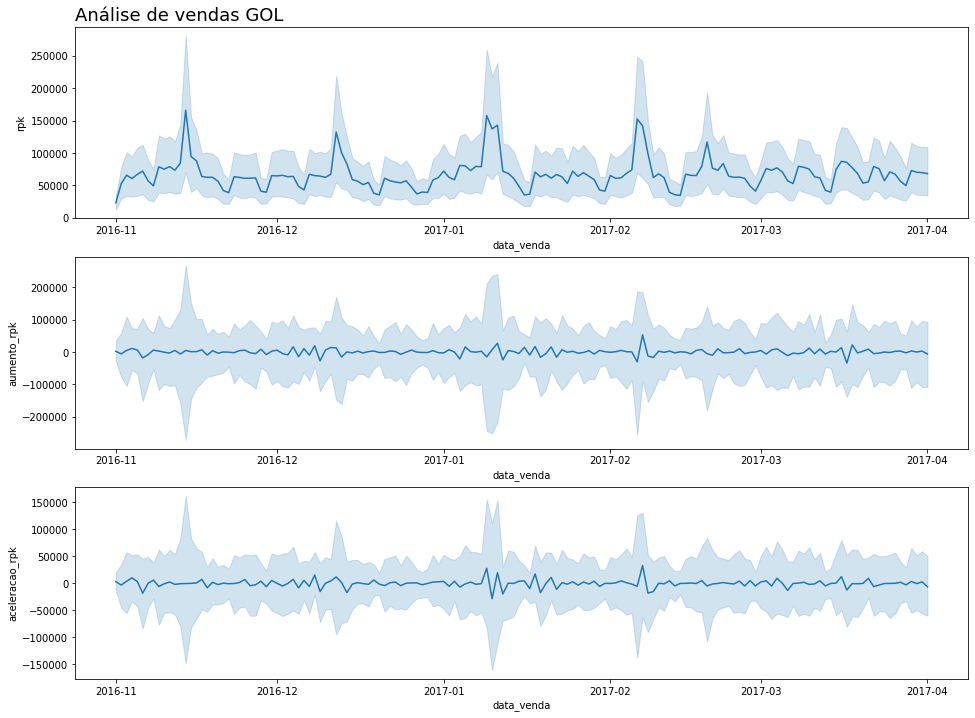

In [19]:
plot_comparacao(x='data_venda', y1='rpk', y2='aumento_rpk', y3='aceleracao_rpk', dataset=_df, titulo='Análise de vendas GOL')

<AxesSubplot:xlabel='data_venda', ylabel='aceleracao_km'>

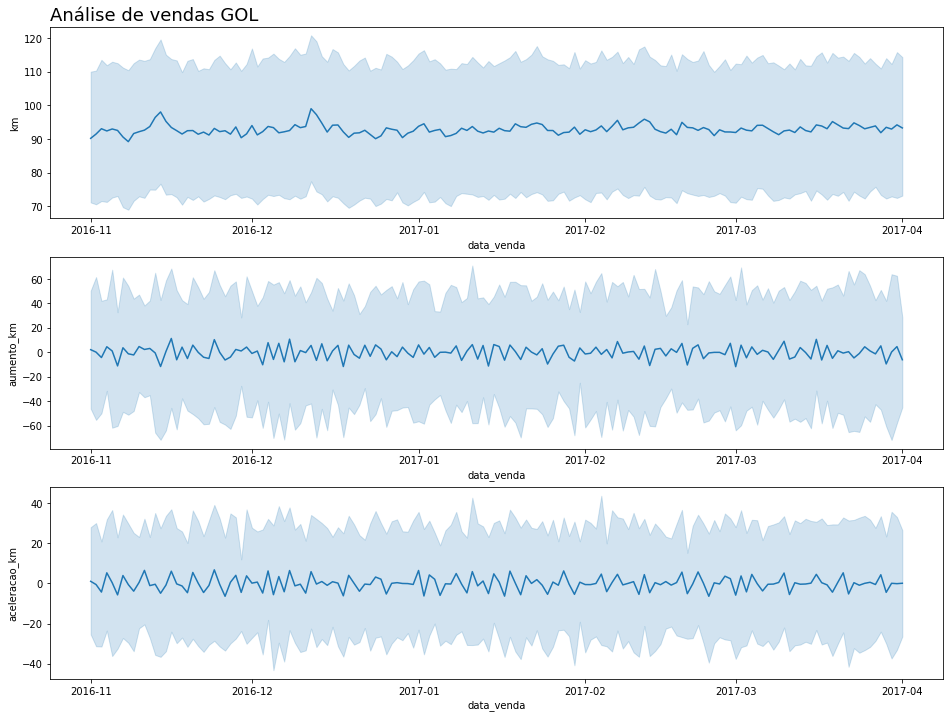

In [20]:
plot_comparacao(x='data_venda', y1='km', y2='aumento_km', y3='aceleracao_km', dataset=_df, titulo='Análise de vendas GOL')

1. Faça um ranking para o número total de PAX por dia da semana.

In [21]:
_ranking = _df.groupby(['data_venda'])['pax'].sum().reset_index()
_ranking = _ranking.sort_values('pax').reset_index(drop=True)
_ranking['ranking'] = _ranking.index
_ranking

,data_venda,pax,ranking
0,2016-11-01,4538,0
1,2017-01-16,5751,1
2,2017-02-13,6127,2
3,2017-01-17,6197,3
4,2017-02-14,6298,4
...,...,...,...
147,2017-02-06,23444,147
148,2017-01-10,23460,148
149,2017-01-11,24298,149
150,2016-11-14,24551,150


* Shoing the 5 first and lasts PAX of Ranking.

In [22]:
_ranking.head(5)

,data_venda,pax,ranking
0,2016-11-01,4538,0
1,2017-01-16,5751,1
2,2017-02-13,6127,2
3,2017-01-17,6197,3
4,2017-02-14,6298,4


In [23]:
_ranking.tail(5)

,data_venda,pax,ranking
147,2017-02-06,23444,147
148,2017-01-10,23460,148
149,2017-01-11,24298,149
150,2016-11-14,24551,150
151,2017-01-09,26247,151


* Sum of total of pax

In [24]:
_df['pax'].sum()

1758343

In [25]:
_ranking['pax'].sum()

1758343

In [26]:
_df['rpk'].sum()

162307763

2. Qual a correlação de sábado e domingo somados com o total de RPK?

In [27]:
from datetime import date

def find_day(year,  month, day):

    DIAS = [
        'Segunda-feira',
        'Terça-feira',
        'Quarta-feira',
        'Quinta-feira',
        'Sexta-feira',
        'Sábado',
        'Domingo'
    ]

    data = date(year=year,  month=month, day=day)
    # print(data)

    indice_da_semana = data.weekday()
    # print(indice_da_semana)

    dia_da_semana = DIAS[indice_da_semana]
    # print(dia_da_semana)
    return dia_da_semana

In [28]:
_df['data_venda_str'] = _df['data_venda'].astype(str)
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01


In [29]:
_df['data_venda_str'].str.split('-', expand=True)

,0,1,2
0,2016,11,01
1,2016,11,01
2,2016,11,01
3,2016,11,01
4,2016,11,01
...,...,...,...
2427,2017,04,01
2428,2017,04,01
2429,2017,04,01
2430,2017,04,01


In [30]:
_df['year'] = _df['data_venda_str'].str.split('-', expand=True)[0]
_df['month'] = _df['data_venda_str'].str.split('-', expand=True)[1]
_df['day'] = _df['data_venda_str'].str.split('-', expand=True)[2]

In [31]:
_df.head()

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01,2016,11,01
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01,2016,11,01
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01


In [32]:
_df['dias_da_semana'] = _df.apply( lambda x: find_day(int(x['year']), int(x['month']), int(x['day'])), axis=1 )


In [33]:
_df.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01,2016,11,01,Terça-feira
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01,2016,11,01,Terça-feira
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01,Terça-feira
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01,Terça-feira
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01,Terça-feira


In [34]:
_df2 = _df[['data_venda', 'dias_da_semana', 'rpk']]
_df2 = _df2.groupby(['data_venda']).sum().reset_index()
_df2.head(5)

,data_venda,rpk
0,2016-11-01,367479
1,2016-11-02,837263
2,2016-11-03,1051716
3,2016-11-04,968225
4,2016-11-05,1069765


In [35]:
_df2['data_venda'].min()

Timestamp('2016-11-01 00:00:00')

In [36]:
_df2['data_venda'].max()

Timestamp('2017-04-01 00:00:00')

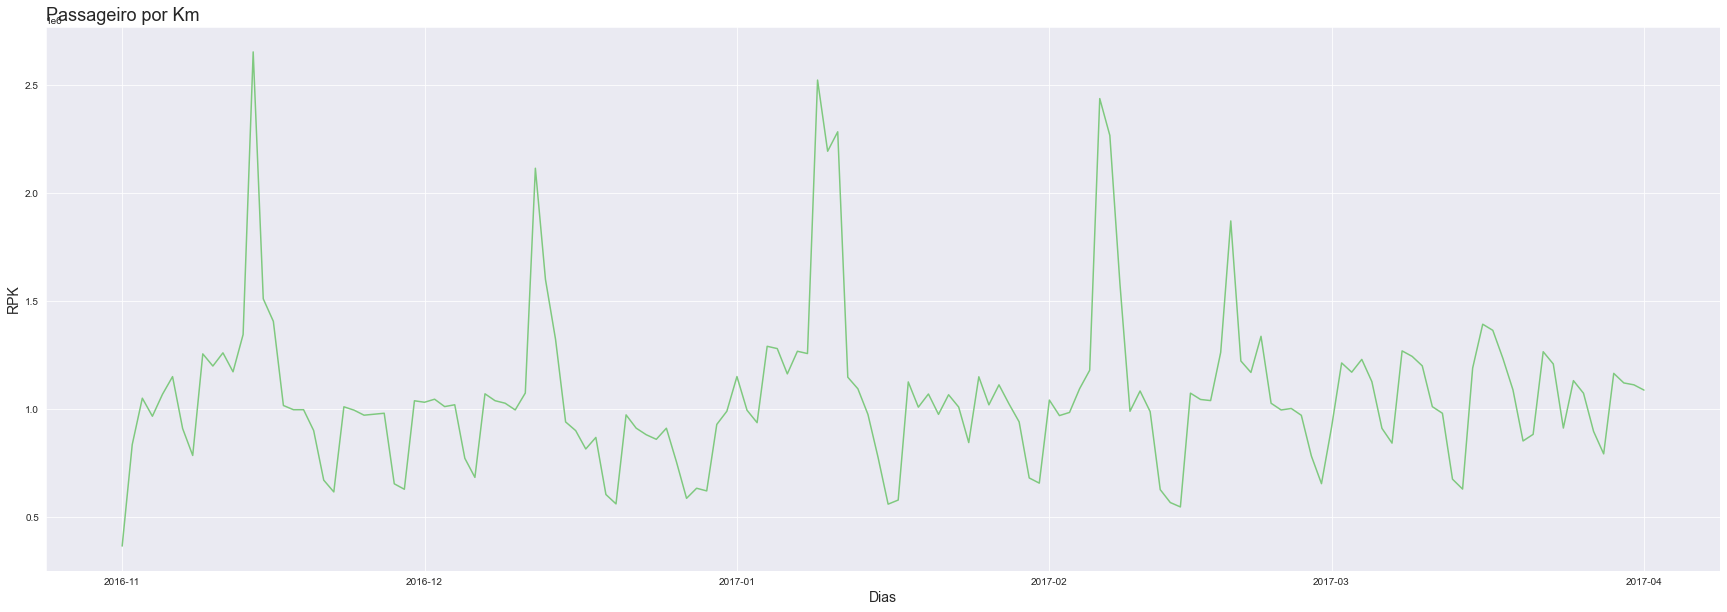

In [37]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'data_venda', y = 'rpk', data = _df2)
ax.figure.set_size_inches(30, 10)
# ax.set(xticks=_df2.data_venda.values)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
ax = ax

In [38]:
_df2['rpk'].max()

2653733

In [56]:
_df2[_df2['rpk'] > 2000000]
_df2['data_venda_str'] = _df2['data_venda'].astype(str)
_df2['year'] = _df2['data_venda_str'].str.split('-', expand=True)[0]
_df2['month'] = _df2['data_venda_str'].str.split('-', expand=True)[1]
_df2['day'] = _df2['data_venda_str'].str.split('-', expand=True)[2]
_df2['dias_da_semana'] = _df2.apply( lambda x: find_day(int(x['year']), int(x['month']), int(x['day'])), axis=1 ) 
_df2.drop(columns=['data_venda_str','year','month','day'], inplace=True)
_df2.groupby(['dias_da_semana'])['rpk'].sum().sort_values()

dias_da_semana
Terça-feira      20366840
Domingo          22388695
Sábado           23201577
Segunda-feira    23275908
Sexta-feira      23309936
Quinta-feira     23501102
Quarta-feira     26263705
Name: rpk, dtype: int64

In [40]:
_df4 = _df[['data_venda', 'dias_da_semana', 'rpk']]
_df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})
_df4 = _df4.groupby(['dias_da_semana']).sum().reset_index()
_df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})
_df4 = _df4.sort_values(['order'])
_df4 = _df4.drop(columns='order')
_df4

C:\Users\conta\AppData\Local\Temp/ipykernel_21396/3433924337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df4['order'] = _df4['dias_da_semana'].map({'Segunda-feira':1, 'Terça-feira':2, 'Quarta-feira':3, 'Quinta-feira':4, 'Sexta-feira':5, 'Sábado':6, 'Domingo':7})


,dias_da_semana,rpk
3,Segunda-feira,23275908
6,Terça-feira,20366840
1,Quarta-feira,26263705
2,Quinta-feira,23501102
4,Sexta-feira,23309936
5,Sábado,23201577
0,Domingo,22388695


Text(0, 0.5, 'RPK')

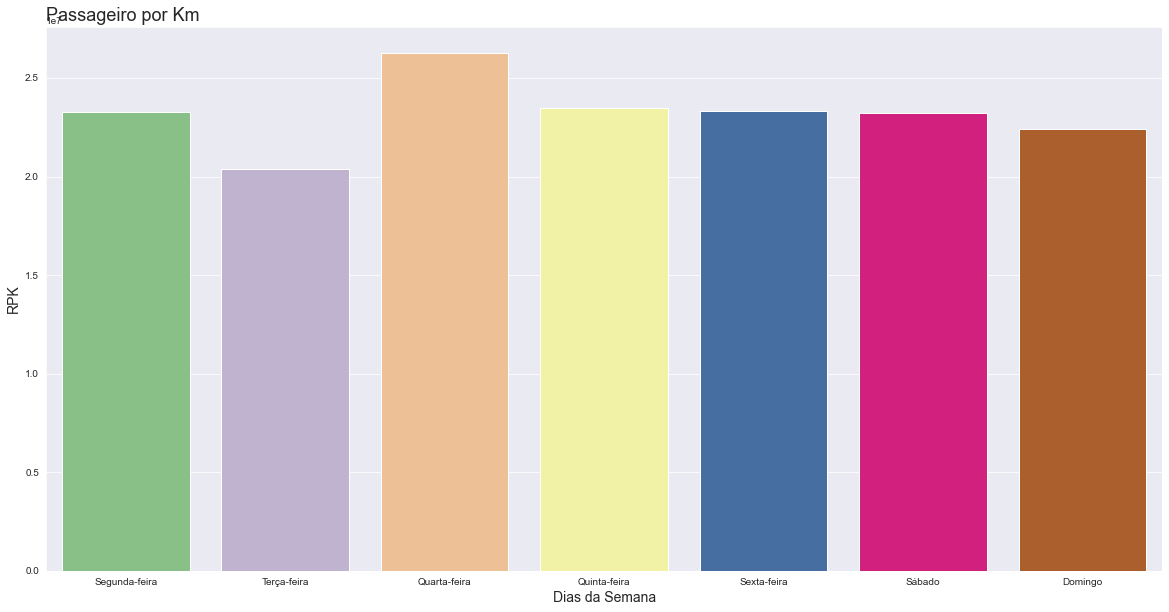

In [41]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.barplot(x = 'dias_da_semana', y = 'rpk', data = _df4)
ax.figure.set_size_inches(20, 10)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias da Semana', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
# for i in ax.containers:
#     ax.bar_label(i)


In [72]:
_data_prk_sab_dom = _df[(_df['dias_da_semana']=='Sábado') | (_df['dias_da_semana']=='Domingo')]
_data_prk_sab_dom.head(5)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana,media_movel_7,media_movel_21
64,2016-11-05,TeleVenda,Mindscape,1378,60813.490656,164710,119.528302,-307.0,-1191.0,-72156.0,-264109.0,-21.044992,-105.547125,2016-11-05,2016,11,05,Sábado,880.142857,730.476190
65,2016-11-05,Telégrafo,Ellipsis,42,2695.438460,2399,57.119048,-1336.0,-1029.0,-162311.0,-90155.0,-62.409254,-41.364262,2016-11-05,2016,11,05,Sábado,870.142857,721.000000
66,2016-11-05,TeleVenda,Arena,206,15726.530904,32153,156.082524,164.0,1500.0,29754.0,192065.0,98.963477,161.372731,2016-11-05,2016,11,05,Sábado,885.857143,720.095238
67,2016-11-05,Porta a Porta,Vast,1314,30005.759983,61962,47.155251,1108.0,944.0,29809.0,55.0,-108.927273,-207.890750,2016-11-05,2016,11,05,Sábado,1035.285714,723.809524
68,2016-11-05,Porta a Porta,Mindscape,877,34594.723120,98153,111.919042,-437.0,-1545.0,36191.0,6382.0,64.763791,173.691064,2016-11-05,2016,11,05,Sábado,900.428571,704.142857


In [76]:
_quantidade_de_dias_fds = _data_prk_sab_dom.groupby(['data_venda','dias_da_semana'])['dias_da_semana'].count()
_quantidade_de_dias_fds.head(5)

data_venda  dias_da_semana
2016-11-05  Sábado            16
2016-11-06  Domingo           16
2016-11-12  Sábado            16
2016-11-13  Domingo           16
2016-11-19  Sábado            16
Name: dias_da_semana, dtype: int64

In [43]:
_data_prk_sab_dom.shape

(688, 18)

In [44]:
_data_prk_sab_dom['rpk'].describe()

count       688.000000
mean      66264.930233
std       77345.549978
min        1671.000000
25%       12829.750000
50%       31592.500000
75%       95087.500000
max      474353.000000
Name: rpk, dtype: float64

In [45]:
_df3 = _data_prk_sab_dom.copy()
_df3 = _df3[['data_venda', 'dias_da_semana', 'rpk']]
_df3.head(5)

,data_venda,dias_da_semana,rpk
64,2016-11-05,Sábado,164710
65,2016-11-05,Sábado,2399
66,2016-11-05,Sábado,32153
67,2016-11-05,Sábado,61962
68,2016-11-05,Sábado,98153


In [46]:
_df3 = _df3.groupby(['data_venda']).sum()
_df3.head(5)

,rpk
data_venda,
2016-11-05,1069765
2016-11-06,1151471
2016-11-12,1173772
2016-11-13,1346138
2016-11-19,998433


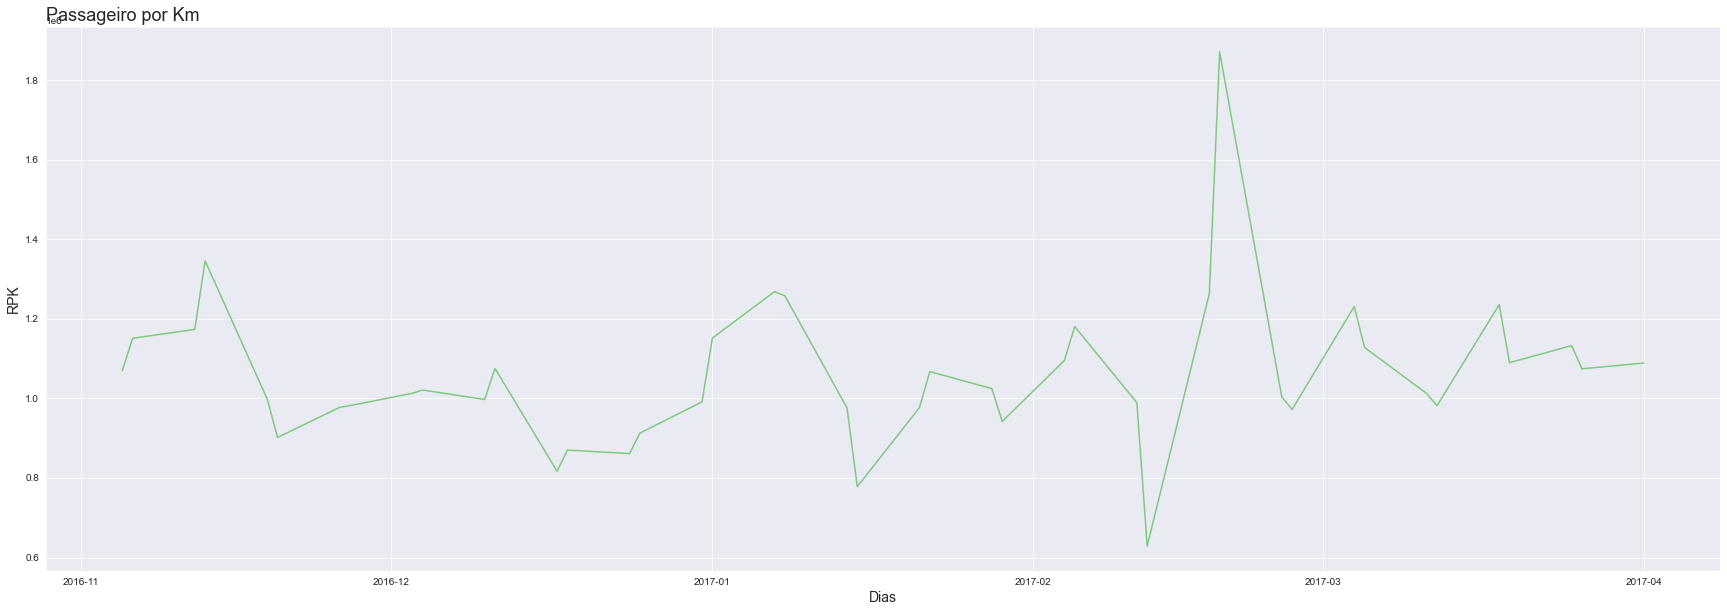

In [47]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'data_venda', y = 'rpk', data = _df3)
ax.figure.set_size_inches(30, 10)
ax.set_title('Passageiro por Km', loc='left', fontsize=18)
ax.set_xlabel('Dias', fontsize=14)
ax.set_ylabel('RPK', fontsize=14)
ax = ax

In [48]:
total_rpk = _df2['rpk'].sum()
total_rpk

162307763

In [49]:
_data_prk_sab_dom = _data_prk_sab_dom['rpk'].sum()
_data_prk_sab_dom

45590272

In [50]:
_representativeness = round( ( ( _data_prk_sab_dom / total_rpk) ) * 100, 2)
print(f"O RPK de Sábado e Domingo representam {_representativeness}% de um total de {total_rpk:,.2f} do RPK de todos os períodos ")


O RPK de Sábado e Domingo representam 28.09% de um total de 162,307,763.00 do RPK de todos os períodos 


In [57]:
_df.head(2)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.000000,0.0,2016-11-01,2016,11,01,Terça-feira
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.0,2016-11-01,2016,11,01,Terça-feira


In [59]:
vendas_rpk_agrupadas = _df.groupby('dias_da_semana')['rpk','aumento_rpk','aceleracao_rpk'].mean().round()
vendas_rpk_agrupadas

C:\Users\conta\AppData\Local\Temp/ipykernel_21396/626739433.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_rpk_agrupadas = _df.groupby('dias_da_semana')['rpk','aumento_rpk','aceleracao_rpk'].mean().round()


,rpk,aumento_rpk,aceleracao_rpk
dias_da_semana,,,
Domingo,66633.0,-1533.0,-640.0
Quarta-feira,74613.0,-460.0,-590.0
Quinta-feira,66764.0,-651.0,-453.0
Segunda-feira,69274.0,-1358.0,811.0
Sexta-feira,66221.0,-1123.0,-397.0
Sábado,65914.0,2365.0,840.0
Terça-feira,57860.0,2581.0,437.0


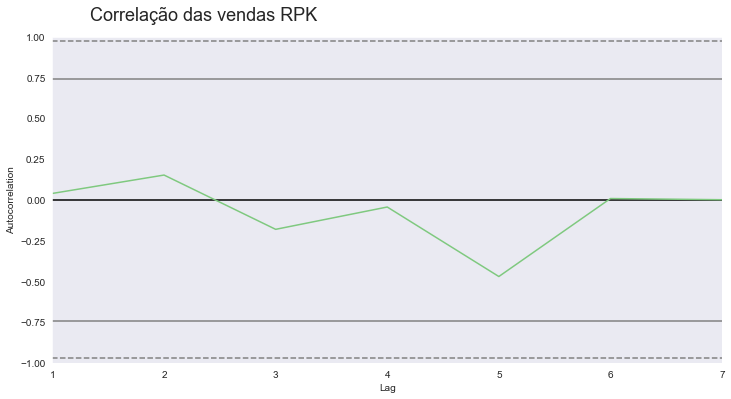

In [63]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas RPK', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_rpk_agrupadas['rpk'])
ax = ax

3. Qual a média de ‘Monetário’ por mês por Canal? E a mediana?

In [51]:
_df_sum_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].sum().reset_index()
_df_sum_channels = _df_sum_channels.sort_values(['monetário_vendido']).reset_index(drop=True).rename(columns={'monetário_vendido':'soma_monetário_vendido'})
_df_sum_channels

,data_venda,canal_de_venda,soma_monetário_vendido
0,2017-02-14,Telégrafo,7500.944465
1,2017-03-07,Telégrafo,9887.166630
2,2016-11-01,Telégrafo,10158.006555
3,2016-12-29,Telégrafo,10405.957828
4,2017-01-31,Telégrafo,10664.869419
...,...,...,...
451,2017-02-08,TeleVenda,349715.586496
452,2017-02-05,TeleVenda,358595.468696
453,2017-01-18,TeleVenda,365814.443628
454,2017-02-18,TeleVenda,374294.488479


In [52]:
_df_mean_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].mean().reset_index()
_df_mean_channels = _df_mean_channels.sort_values(['monetário_vendido']).reset_index(drop=True).rename(columns={'monetário_vendido':'media_monetário_vendido'})
_df_mean_channels

,data_venda,canal_de_venda,media_monetário_vendido
0,2017-02-14,Telégrafo,1875.236116
1,2017-03-07,Telégrafo,2471.791657
2,2016-11-01,Telégrafo,2539.501639
3,2016-12-29,Telégrafo,2601.489457
4,2017-01-31,Telégrafo,2666.217355
...,...,...,...
451,2017-02-07,Porta a Porta,57817.974229
452,2016-12-12,Porta a Porta,60264.692703
453,2016-11-15,Porta a Porta,61025.684473
454,2017-02-06,Porta a Porta,62582.661791


In [53]:
_df_median_channels = _df.groupby(['data_venda', 'canal_de_venda'])['monetário_vendido'].median().reset_index()
_df_median_channels = _df_median_channels.sort_values('monetário_vendido').reset_index(drop=True).rename(columns={'monetário_vendido':'mediana_monetário_vendido'})
_df_median_channels

,data_venda,canal_de_venda,mediana_monetário_vendido
0,2017-02-14,Telégrafo,1855.066440
1,2016-11-29,Telégrafo,1927.050453
2,2017-01-24,Telégrafo,1952.403237
3,2017-03-07,Telégrafo,2131.861597
4,2016-11-22,Telégrafo,2291.569788
...,...,...,...
451,2017-01-10,Porta a Porta,54620.850069
452,2017-02-07,Porta a Porta,54622.131114
453,2017-02-06,Porta a Porta,54958.440086
454,2016-11-15,Porta a Porta,56412.237777


4. Crie um forecast de PAX por ‘Local de Venda’ para os próximos 15 dias a contar da última data de venda. (Aqui a técnica é livre) 


##### Fazendo média móvel de 7 e 21 dias de PAX.

In [64]:
_df.head()

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01,2016,11,01,Terça-feira
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01,2016,11,01,Terça-feira
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01,Terça-feira
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01,Terça-feira
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01,Terça-feira


In [67]:
_df['media_movel_7'] = _df['pax'].rolling(7).mean().fillna(0)
_df['media_movel_21'] = _df['pax'].rolling(21).mean().fillna(0)

In [69]:
_df.head(30)

,data_venda,canal_de_venda,local_de_venda,pax,monetário_vendido,rpk,km,aceleracao_pax,aumento_pax,aceleracao_rpk,aumento_rpk,aceleracao_km,aumento_km,data_venda_str,year,month,day,dias_da_semana,media_movel_7,media_movel_21
0,2016-11-01,Telégrafo,Mindscape,30,2188.109487,3476,115.866667,0.0,0.0,0.0,0.0,0.000000,0.000000,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
1,2016-11-01,TeleVenda,Arena,52,3302.375951,8197,157.634615,22.0,0.0,4721.0,0.0,41.767949,0.000000,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
2,2016-11-01,TeleVenda,Mindscape,19,1041.544400,2425,127.631579,-33.0,-55.0,-5772.0,-10493.0,-30.003036,-71.770985,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
3,2016-11-01,Porta a Porta,Mindscape,496,15566.340547,53278,107.415323,477.0,510.0,50853.0,56625.0,-20.216256,9.786780,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
4,2016-11-01,TeleVenda,Vast,46,2721.427289,2039,44.326087,-450.0,-927.0,-51239.0,-102092.0,-63.089236,-42.872979,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
5,2016-11-01,TeleVenda,Arena,485,19002.649824,66096,136.280412,439.0,889.0,64057.0,115296.0,91.954325,155.043561,2016-11-01,2016,11,01,Terça-feira,0.000000,0.000000
6,2016-11-01,TeleVenda,Vast,701,11588.271344,30866,44.031384,216.0,-223.0,-35230.0,-99287.0,-92.249029,-184.203354,2016-11-01,2016,11,01,Terça-feira,261.285714,0.000000
7,2016-11-01,Telégrafo,Arena,39,3538.393295,5471,140.282051,-662.0,-878.0,-25395.0,9835.0,96.250668,188.499696,2016-11-01,2016,11,01,Terça-feira,262.571429,0.000000
8,2016-11-01,TeleVenda,Ellipsis,44,2277.585505,2788,63.363636,5.0,667.0,-2683.0,22712.0,-76.918415,-173.169082,2016-11-01,2016,11,01,Terça-feira,261.428571,0.000000
9,2016-11-01,Porta a Porta,Vast,910,14451.803370,40112,44.079121,866.0,861.0,37324.0,40007.0,-19.284515,57.633899,2016-11-01,2016,11,01,Terça-feira,388.714286,0.000000


<AxesSubplot:xlabel='data_venda', ylabel='media_movel_21'>

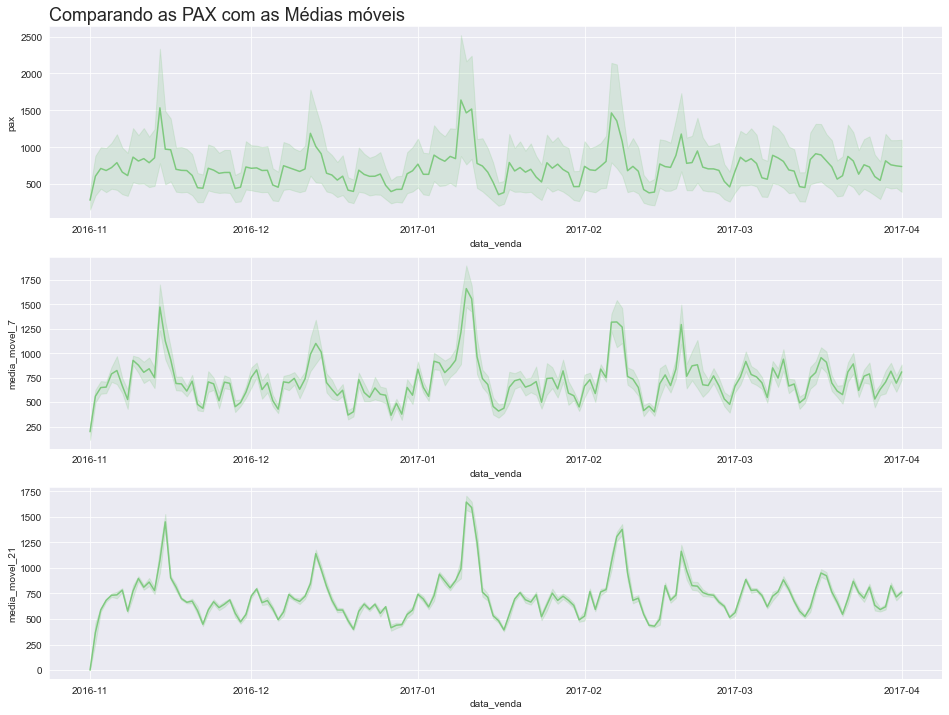

In [70]:
titulo = 'Comparando as PAX com as Médias móveis'
plot_comparacao(dataset=_df, x='data_venda', y1='pax', y2='media_movel_7', y3='media_movel_21', titulo=titulo )